# Ham or Spam

In [1]:
#!pip install wordcloud

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('spam.csv',encoding='latin-1') #you have until latin8,in utf8 everything is included

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
#Aim: Determine whether a mail received is spam or not

In [8]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1) #axis=1 implies columns
#df=df[['v1','v2']] #both lines are same

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.columns=['Class','Text']

In [11]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

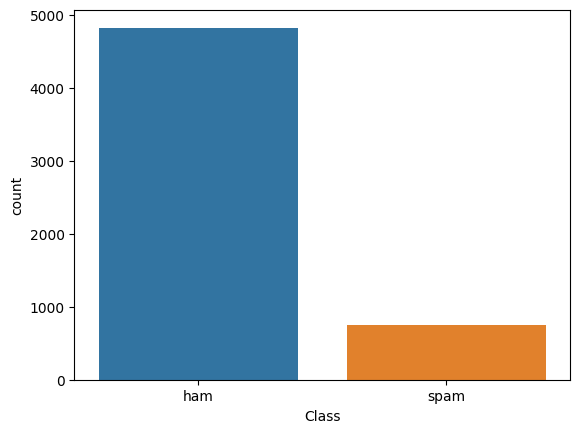

In [13]:
sns.countplot(x=df["Class"])

In [14]:
df.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [15]:
#convert class to 1 or 0
d={'ham':0,'spam':1}

In [16]:
df['Class']=df['Class'].map(d)

In [17]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
#convert to lowercase, remove punctuations,numbers,new lines,digits

In [19]:
df['Text']=df['Text'].str.lower()  #lowercase
df['Text']=df['Text'].str.replace('[^\w\s]','') #Remove Punctuations
df['Text']=df['Text'].str.replace('\n','') #Remove new lines
df['Text']=df['Text'].str.replace('\r','') #remove enters
df['Text']=df['Text'].str.replace('\d+','') #remove digits numbers

In [20]:
#We just need words and spaces

In [21]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image #Pil for read and write images
import numpy as np
import matplotlib.pyplot as plt

In [22]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [23]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [24]:
ham=df[df['Class']==0]['Text']
spam=df[df['Class']==1]['Text']

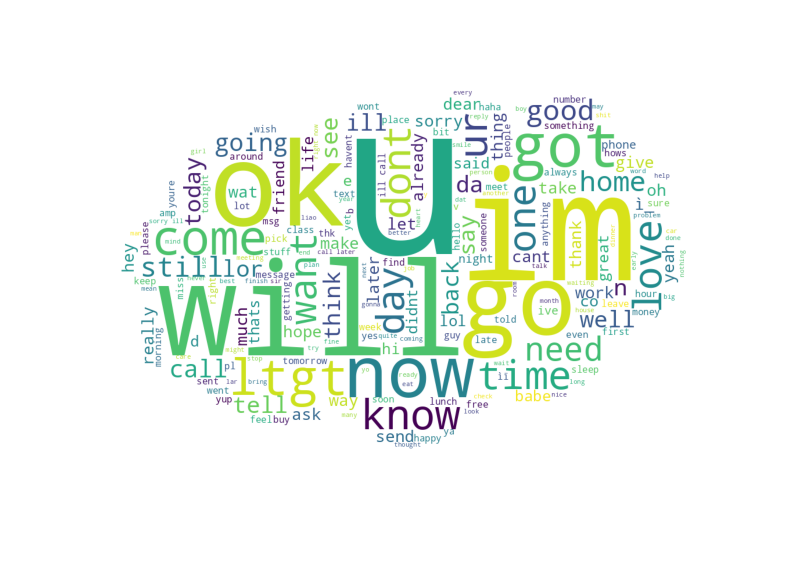

In [25]:
wc(ham,'white')

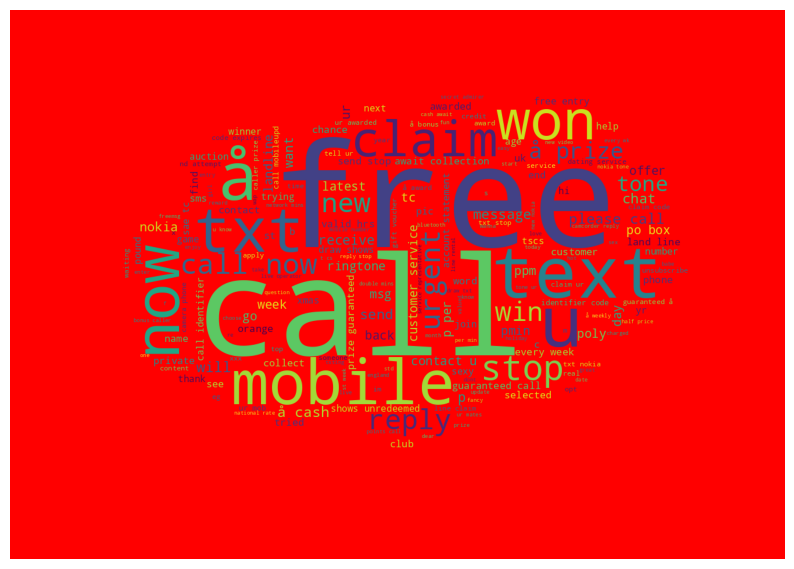

In [26]:
wc(spam,'red')

In [27]:
x=df['Text']
y=df['Class']

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [29]:
#pip install textblob

In [30]:
#pip install nltk

In [31]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
def lemma(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),analyzer=lemma)

In [36]:
x=vect.fit_transform(x)

In [37]:
x

<5572x7241 sparse matrix of type '<class 'numpy.int64'>'
	with 75368 stored elements in Compressed Sparse Row format>

In [38]:
x.shape

(5572, 7241)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [40]:
nb=MultinomialNB()

In [41]:
nb.fit(x_train,y_train)

MultinomialNB()

In [42]:
pred=nb.predict(x_test)

In [43]:
accuracy_score(y_test,pred)

0.9766816143497757

In [44]:
df.Text[0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [45]:
df.Text[1]

'ok lar joking wif u oni'

In [46]:
df.Text[2]

'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs'

In [48]:
' '.join(df.Text)

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ok lar joking wif u oni free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs u dun say so early hor u c already then say nah i dont think he goes to usf he lives around here though freemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send å to rcv even my brother is not like to speak with me they treat me like aids patent as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press  to copy your friends callertune winner as a valued network customer you have been selected to receivea å prize reward to claim call  claim code kl valid  hours only had your mobile  months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on  im g